In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
liver_data = pd.read_csv("C:\\Users\\Senthil\\Desktop\\Project Roster\\indian_liver_patient.csv")



In [42]:
liver_data

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Target  
0        3.3                        0.90       1  
1        3.2                        0.74       1  
2        3.3                        0.89       1  
3        3.4                        1.00       1  
4        2.4                        0.40       1  
..       ...                         ...     ...  
578      1.6                        0.37       2  
579      3.2                        1.10       1  
580      3.2                        1.00       1  
581      3.4                        1.00       1  
582      4.4                        1.50       2  

[583 rows x 11 columns]

In [43]:
liver_data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio      Target  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

In [44]:
liver_data.describe(include='O')

Gender
count     583
unique      2
top      Male
freq      441

In [45]:
liver_data["Target"].value_counts()

1    416
2    167
Name: Target, dtype: int64

13


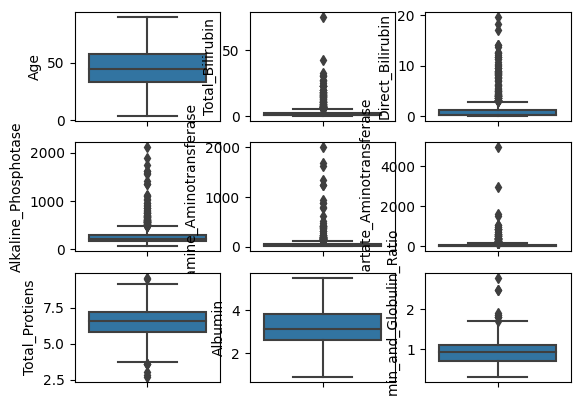

In [46]:
#Analysis via boxplot
print(liver_data.duplicated().sum())
liver_data[liver_data.duplicated()]
#checks for duplicate valuesplt.figure(figsize=(15,15))
plt_num = 1

# Separate the numerical features alone(Exclude features Gender and Target)
liver_data_num = liver_data.columns
liver_data_num = liver_data_num.drop(["Gender", "Target"])

for column in liver_data_num:
    if plt_num <= 9:
        plt.subplot(3,3,plt_num)
        sns.boxplot(y=liver_data[column])
    plt_num+=1
plt.show()                                                             

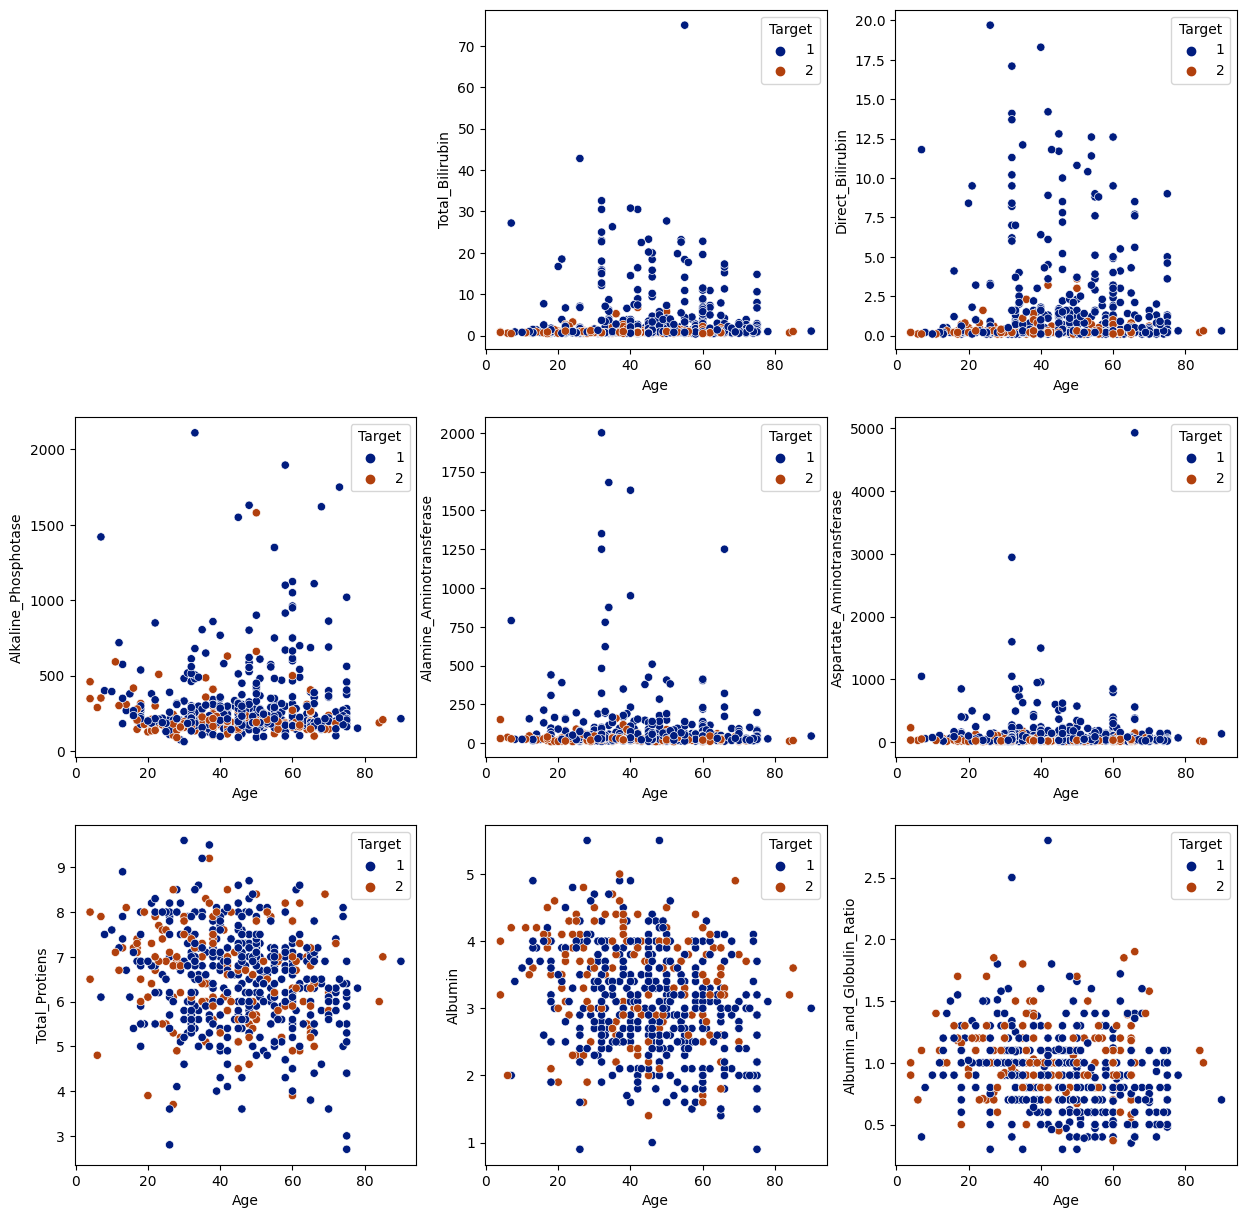

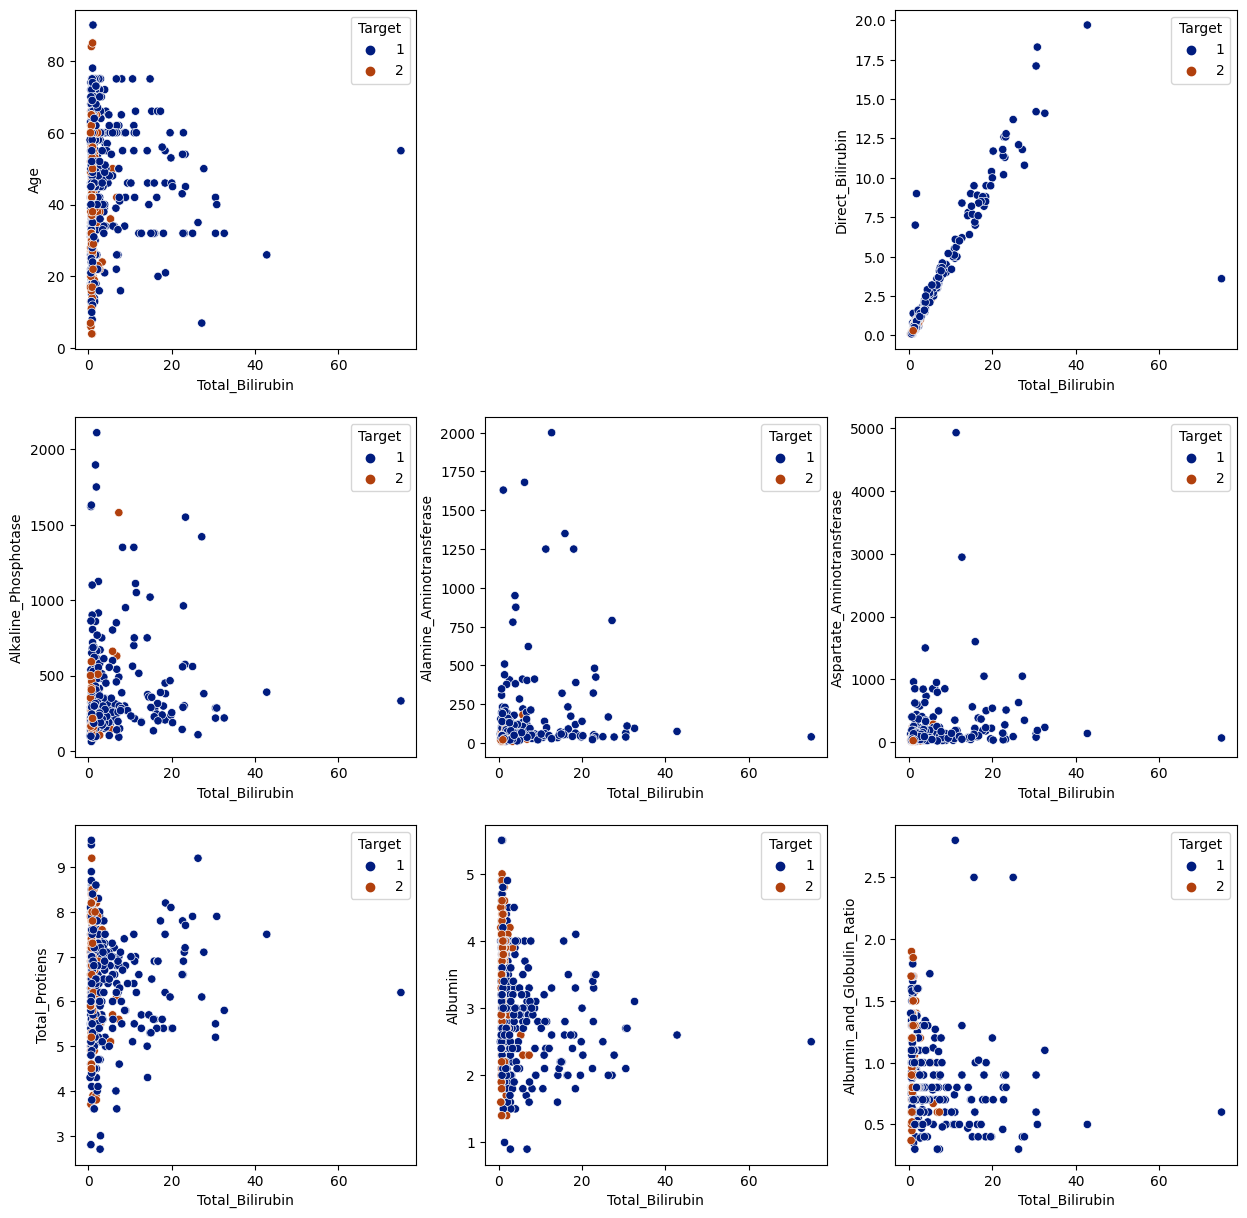

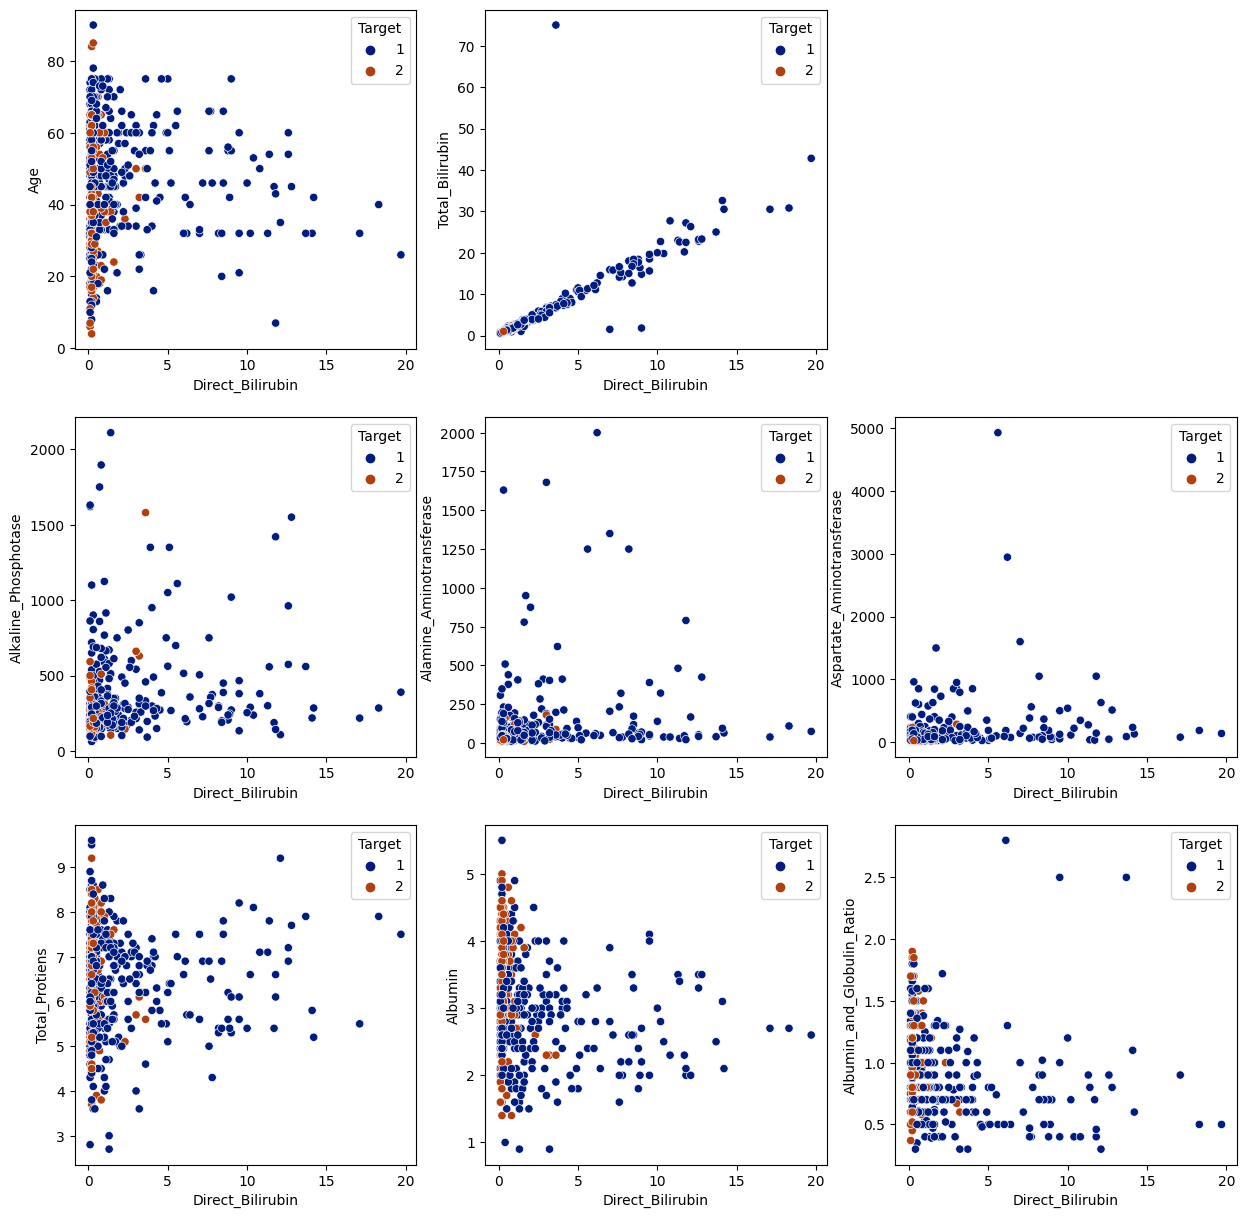

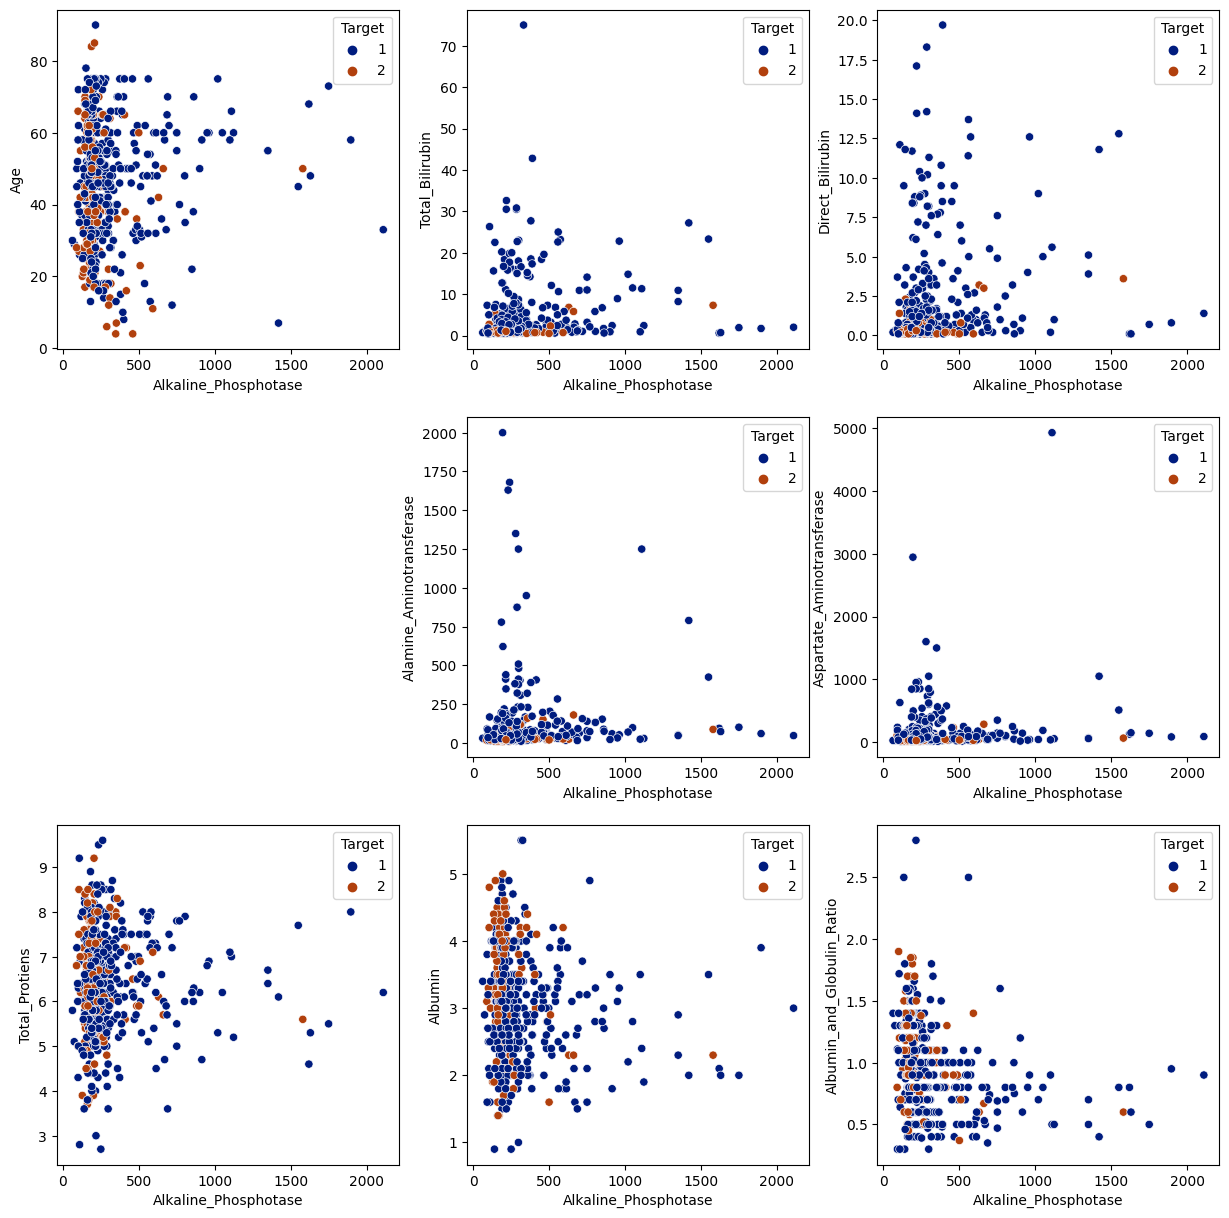

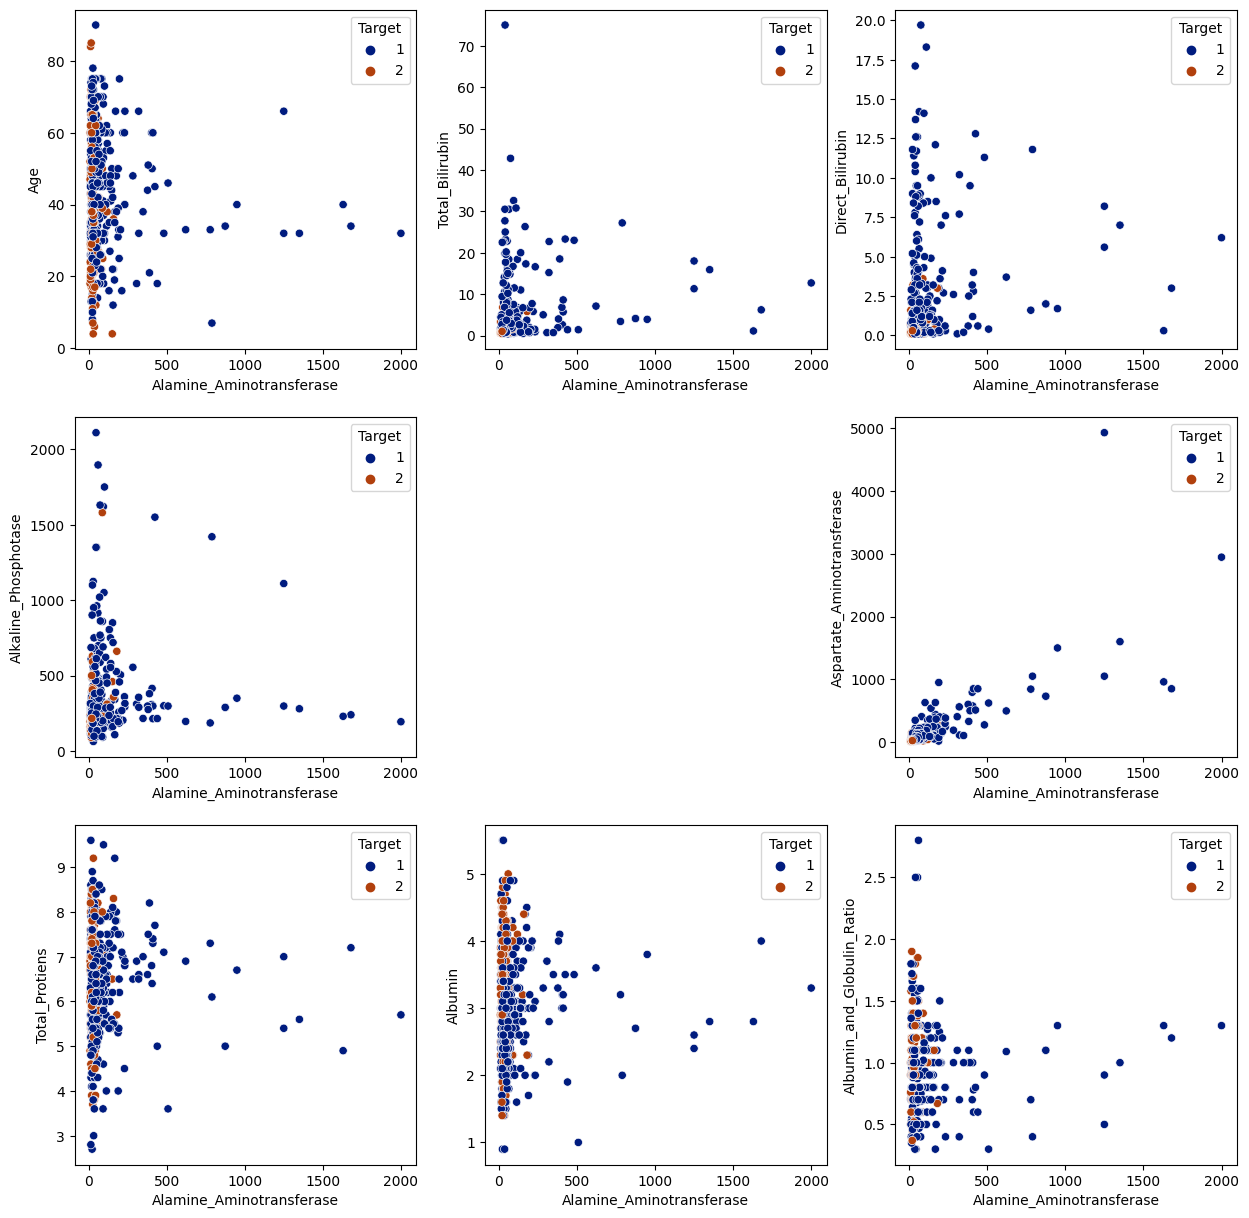

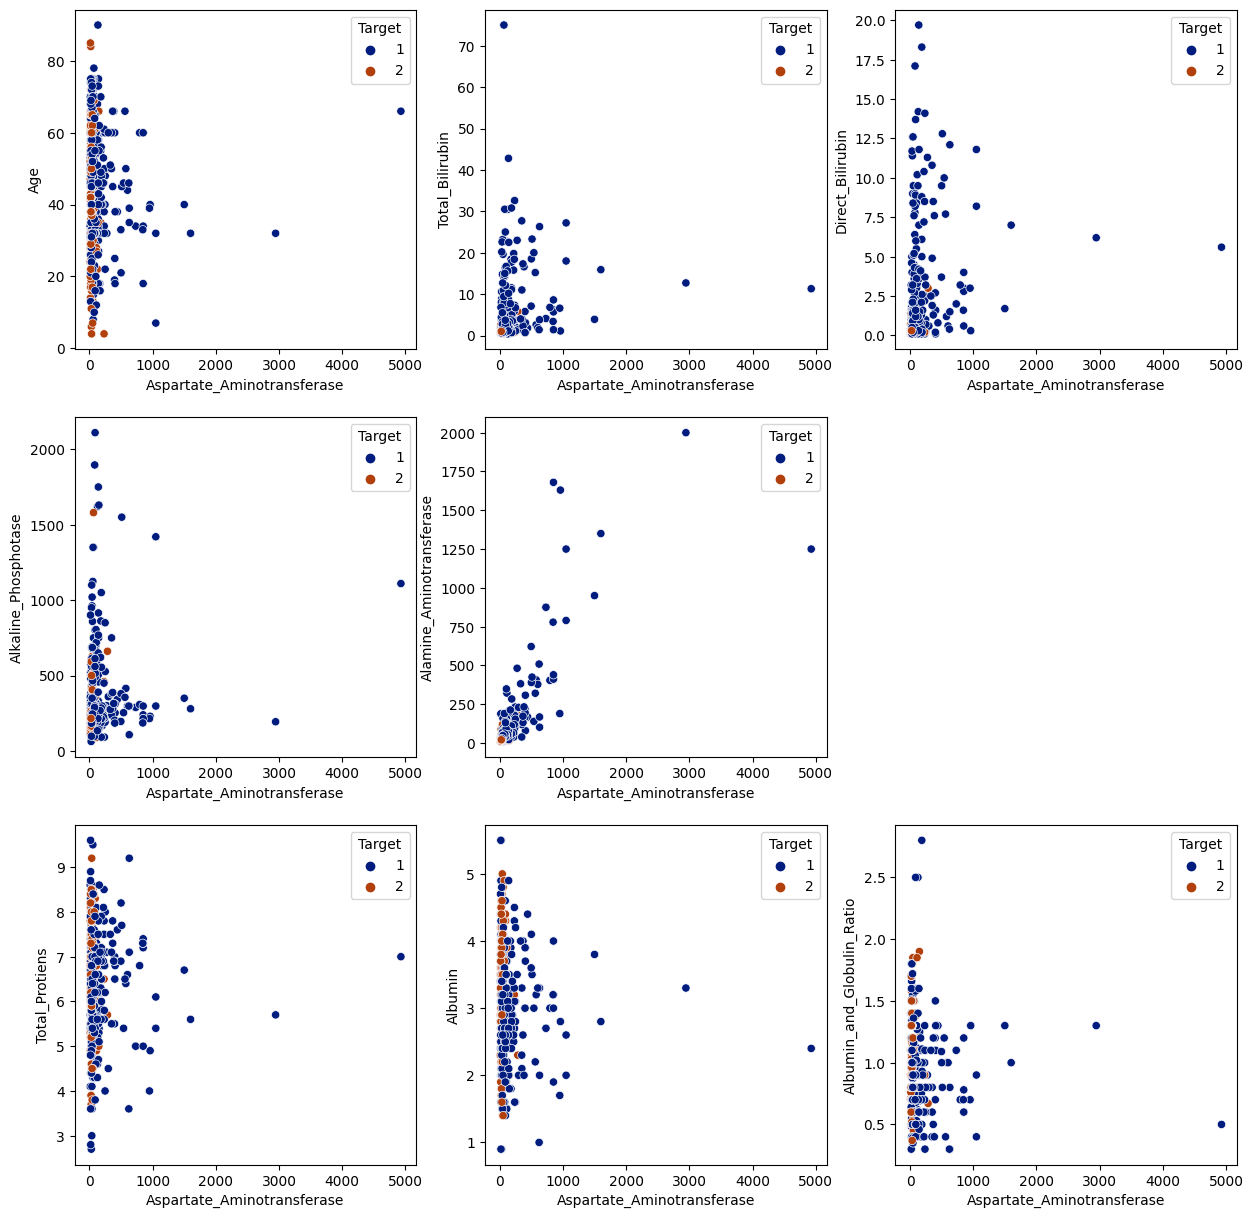

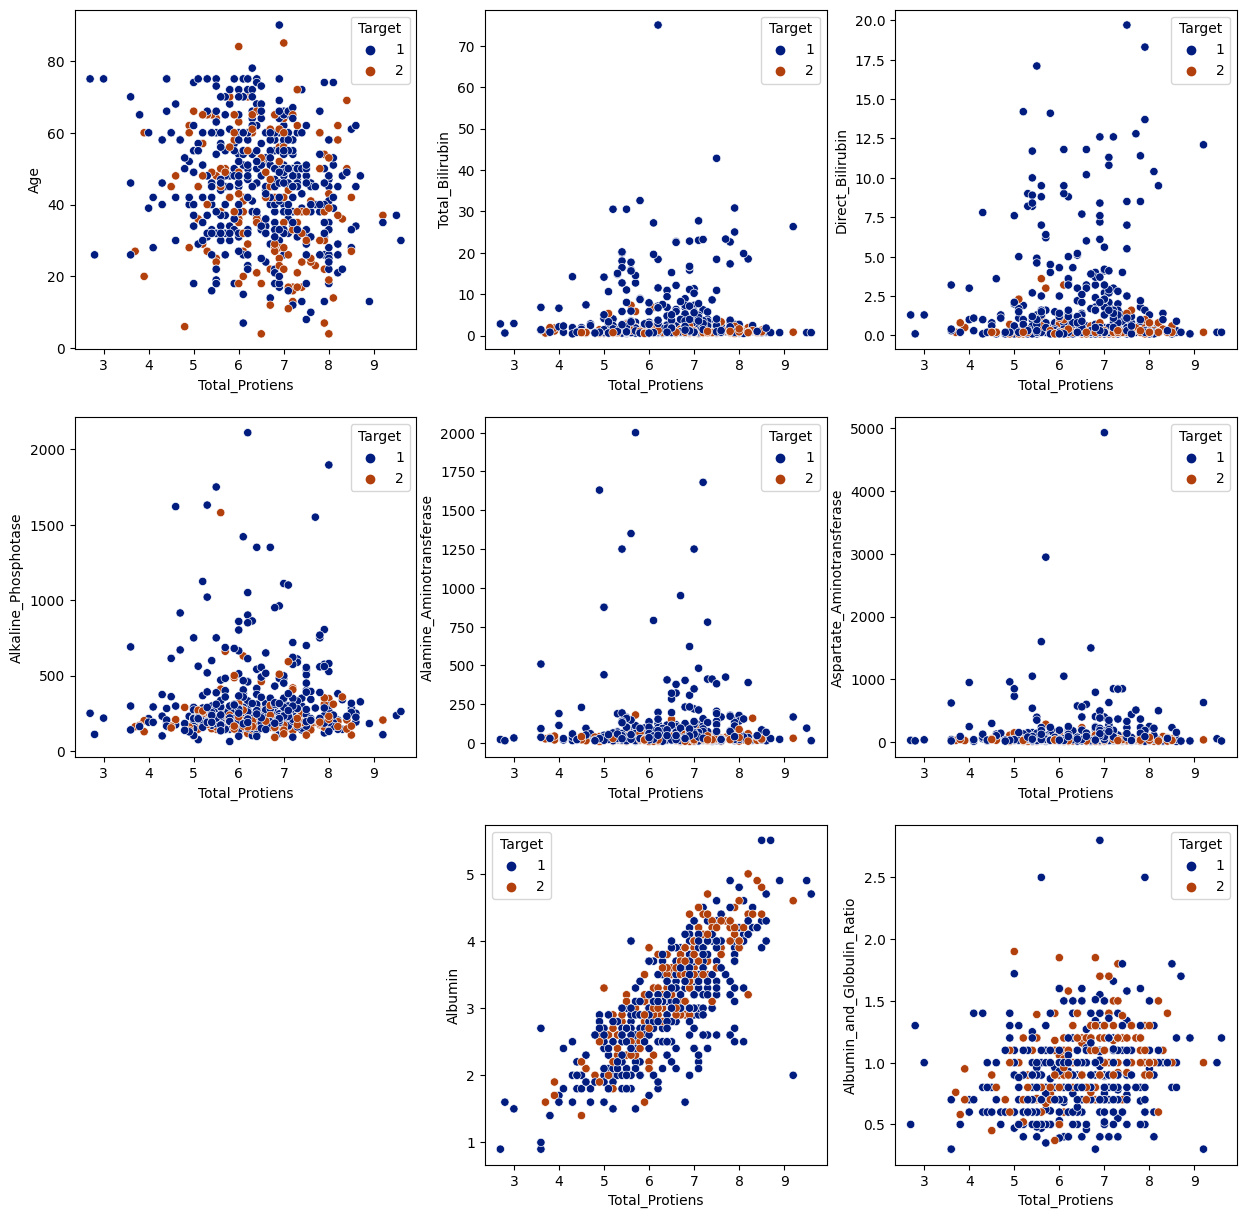

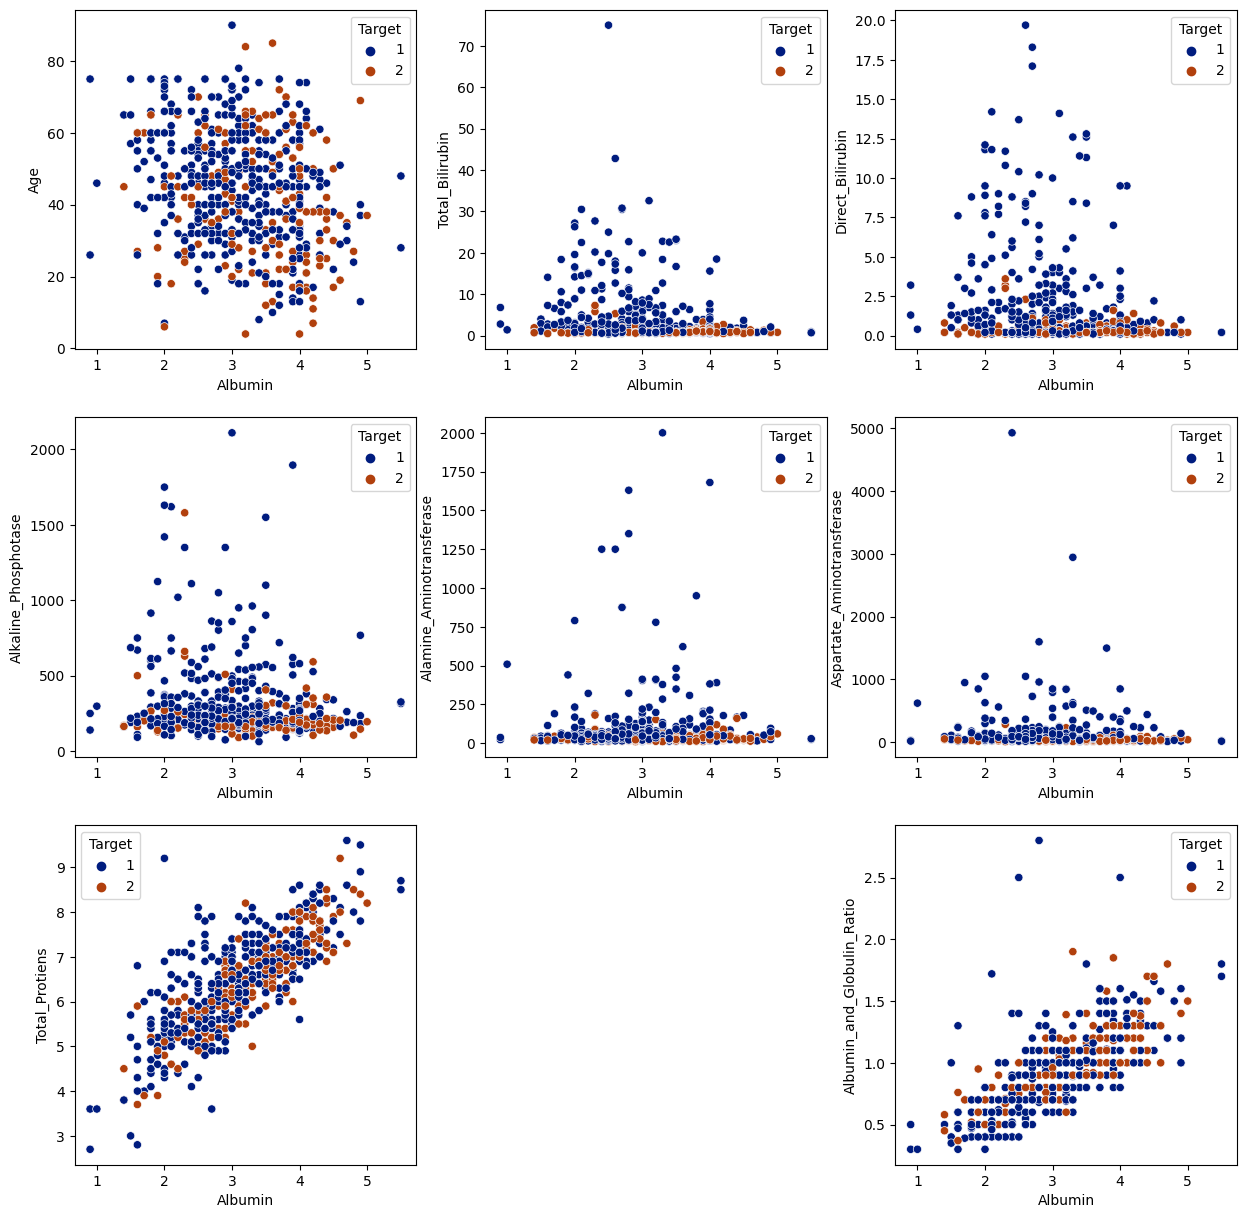

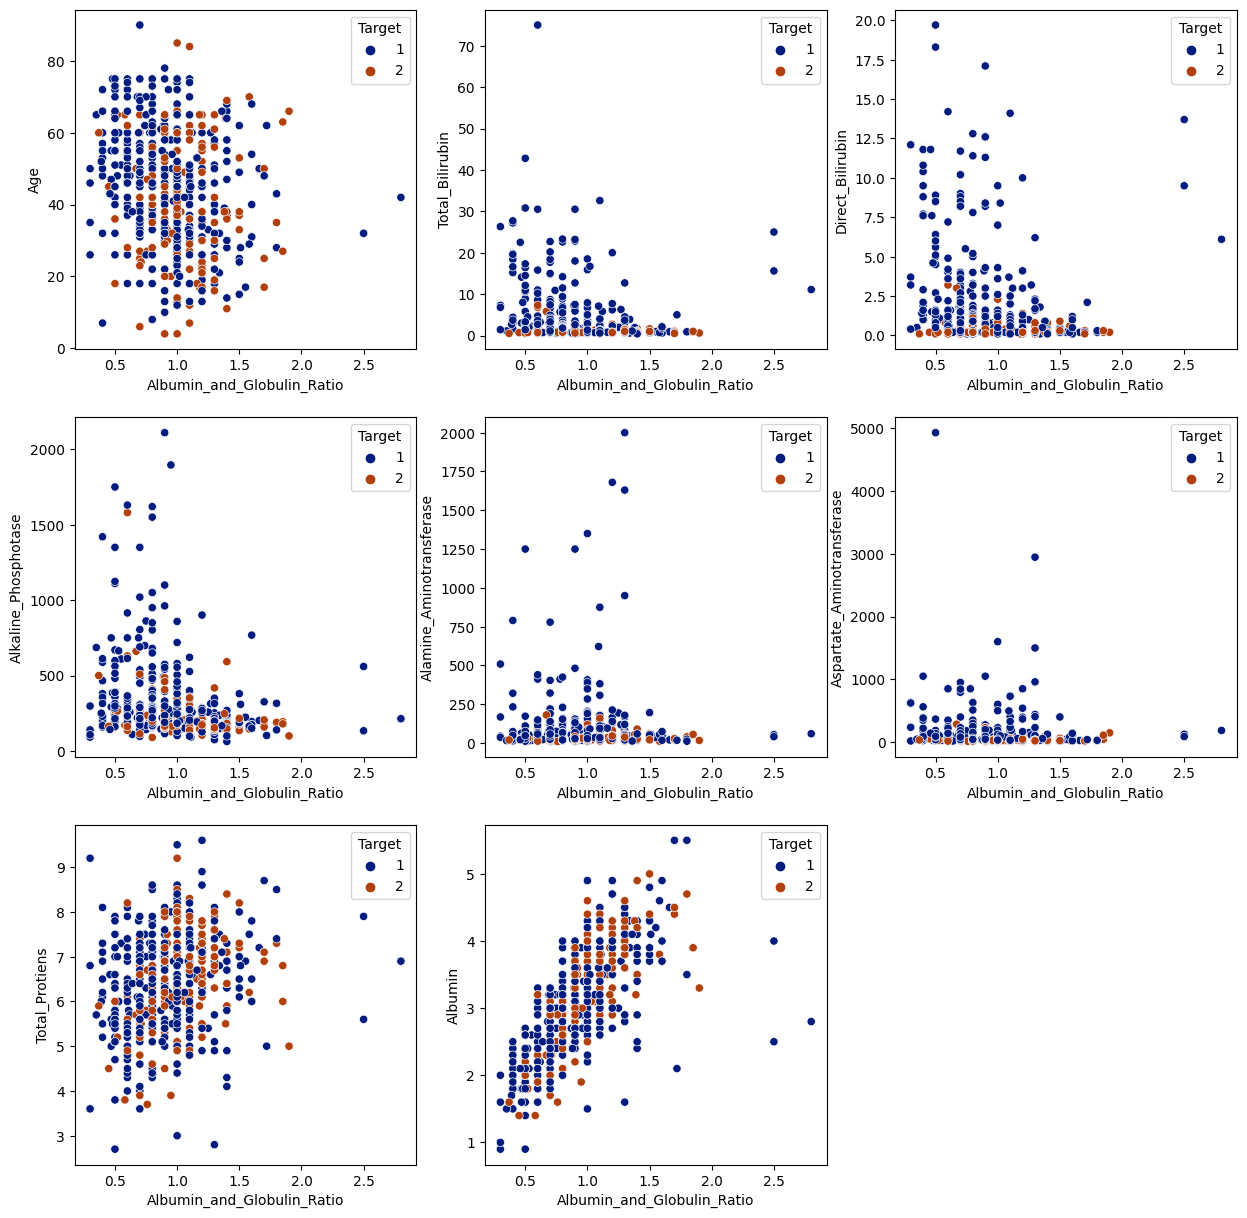

In [47]:
#Bivariate Analyisis
plt_num1 = 1

for column1 in liver_data_num:
    if plt_num1 <= 9:
        plt_num2 = 1
        plt.figure(figsize=(15,15))
        for column2 in liver_data_num:
            if plt_num2 <= 9:
                if column2 != column1:
                    plt.subplot(3,3,plt_num2)
                    sns.scatterplot(x=column1, y=column2, data=liver_data, hue="Target", palette="dark")
            plt_num2+=1
    plt.show()
    plt_num1+=1       

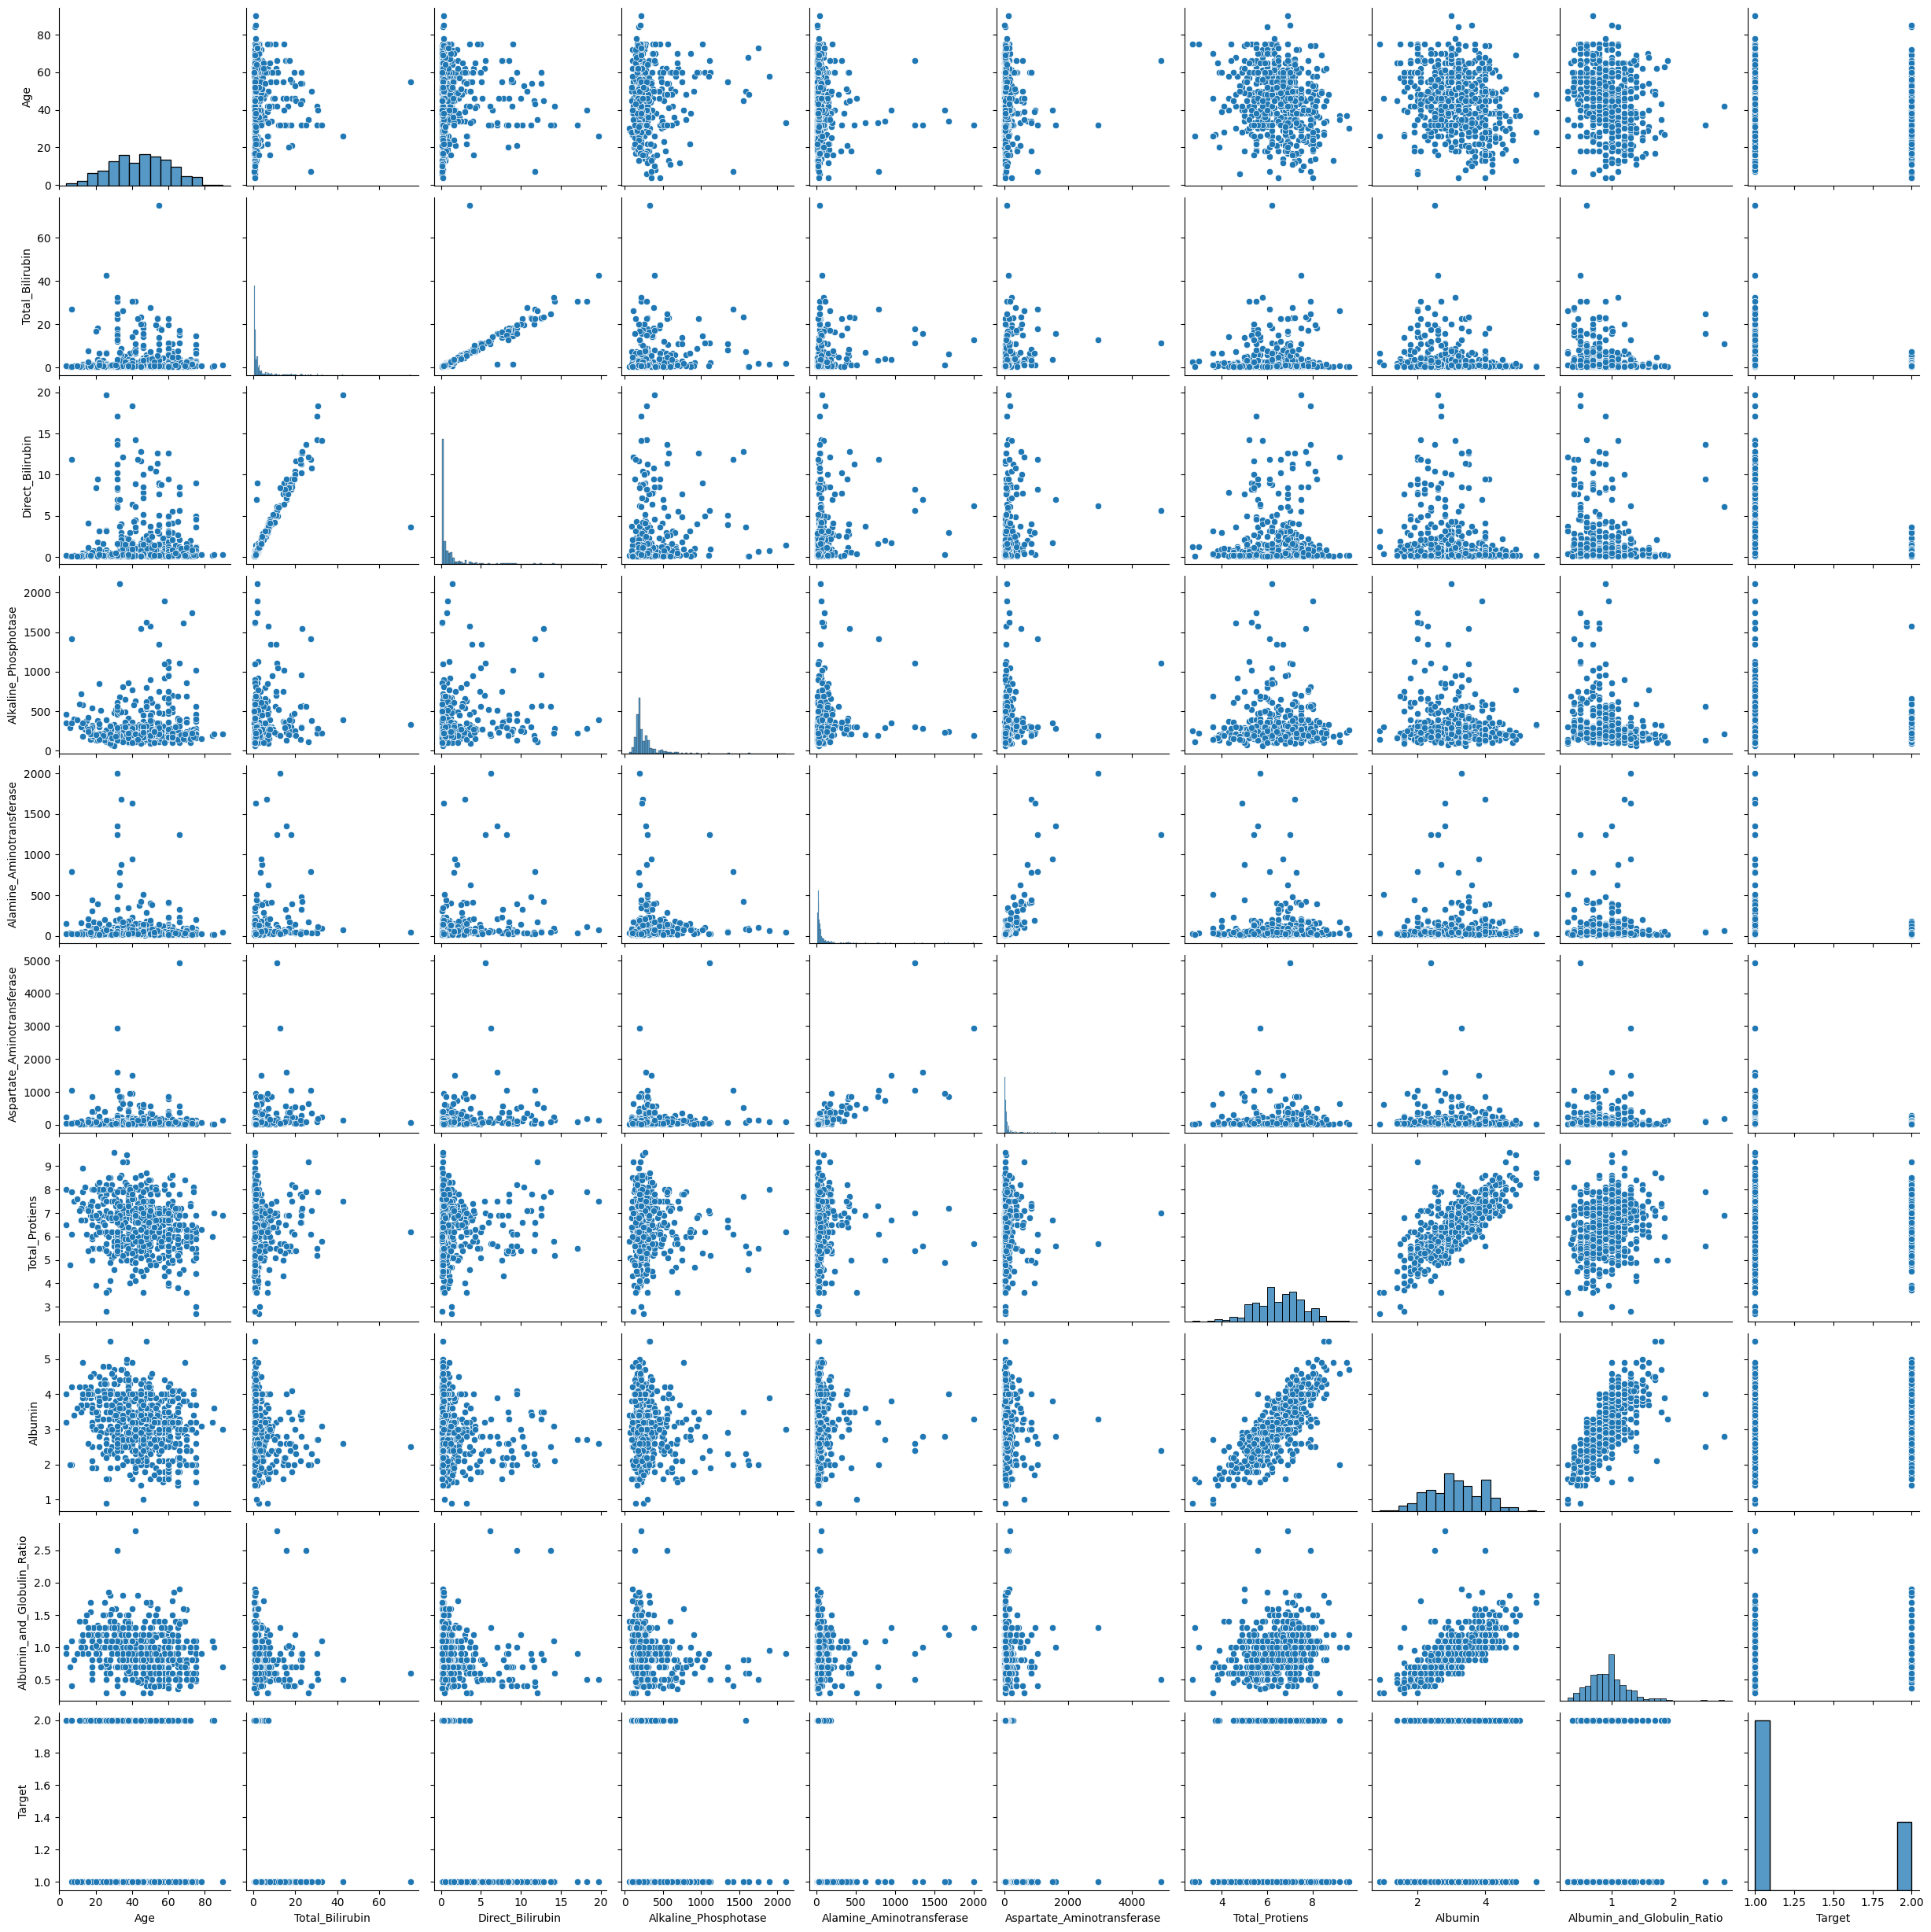

In [48]:
#Multivariate Analysis
sns.pairplot(liver_data, palette="bright")
plt.show()

Inference of Bivariate and Multivariate Analysis
1) In general, an increase in vital features like Direct_Bilirubin, Aspartate_Aminotransferase, Alanine_Aminotransferase etc., 
   beyond their normal range results in liver disease
2) With respect to "Age", whether a patient is young or old, an increase in the value of other features beyond their normal 
   range mostly(~90%) results in liver disease with exception being Total_Proteins, Albumin and Albumin_Globulin_Ratio as the 
   likelihood of disease is random
3) Any feature plotted against (especially)Bilirubin(Total or Direct) shows a likelihood of liver disease when there is an 
   increase in their value beyond the normal range
4) An increase in (especially)Bilirubin plotted against other features shows a ~90% of likelihood of liver disease
5) An increase in Total_Proteins and Albumin vs Albumin_Globulin_Ratio shows random/mixed values of patients containing liver 
   diesease or not

Data pre-processing

In [49]:
liver_data.drop_duplicates(inplace=True)

In [50]:
# Check if duplicate values exist still
liver_data.duplicated().sum()

0

Check for null values and correct them

In [51]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [52]:
# Replace null values with Median value
liver_data.loc[liver_data["Albumin_and_Globulin_Ratio"].isnull()==True, "Albumin_and_Globulin_Ratio"] = np.median(liver_data["Albumin_and_Globulin_Ratio"].dropna(axis=0))

Convert the categorical value to numerical value

In [53]:
liver_data_gender = pd.get_dummies(liver_data['Gender'], prefix='Male', drop_first=True)

In [54]:
liver_data_gender

Male_Male
0            0
1            1
2            1
3            1
4            1
..         ...
578          1
579          1
580          1
581          1
582          1

[570 rows x 1 columns]

In [55]:
# Updated dataframe
liver_data_upd = pd.concat([liver_data, liver_data_gender], axis=1).drop(['Gender'], axis=1)

In [56]:
liver_data_upd.rename(columns={'Male_Male':'Gender'}, inplace=True)

In [57]:
liver_data_upd

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Target  Gender  
0        3.3                        0.90       1       0  
1        3.2                        0.74       1       1  
2        3.3                        0.89       1       1  
3        3.4                        1.00       1       1  
4        2.4                        0.40       1       1  
..       ...                         ...     ...     ...  
578      1.6                        0.37       2       1  
579      3.2                        1.10       1       1  
580      3.2                        1.00       1       1  
581      3.4                        1.00       1       1  
582      4.4                        1.50       2       1  

[570 rows x 11 columns]

Dimensionality Reduction

Steps given below are followed in the order(as referenced in the link)

1) Scale the features
2) Feature selection and/or Feature extraction process
3) SMOTE

Link - https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/#:~:text=Dimensionality%20reduction%20is%20a%20data,before%20training%20a%20predictive%20model.

In [58]:
# Split the dataset into x and y for scaling
X = liver_data_upd.drop(['Target'], axis=1)
y = liver_data_upd['Target']

In [59]:
# Input data follows normal distribution - use Standard Scaler

from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

# Scale only the predictors
X_scl = std_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                                       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
                                       'Total_Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Gender'])

In [60]:
liver_data_upd_scl = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
liver_data_upd_scl

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    1.241741        -0.418647         -0.493702             -0.427421   
1    1.056874         1.210111          1.413923              1.661722   
2    1.056874         0.635255          0.919354              0.808927   
3    0.810385        -0.370743         -0.387723             -0.447823   
4    1.673096         0.092336          0.177500             -0.394778   
..        ...              ...               ...                   ...   
565  0.933630        -0.450584         -0.493702              0.849731   
566 -0.298813        -0.434616         -0.493702             -0.790573   
567  0.440653        -0.402679         -0.458375             -0.190760   
568 -0.853413        -0.322838         -0.352396             -0.439662   
569 -0.422058        -0.370743         -0.423049             -0.309091   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                   -0.351482                   -0.314428        0.279290   
1                   -0.086746                   -0.032278        0.923059   
2                   -0.108807                   -0.142385        0.463224   
3                   -0.362513                   -0.307546        0.279290   
4                   -0.290813                   -0.173353        0.739125   
..                        ...                         ...             ...   
565                 -0.329421                   -0.259374       -0.548414   
566                 -0.246691                   -0.269697       -0.456447   
567                 -0.174991                   -0.207761       -0.088579   
568                 -0.279783                   -0.266256        0.279290   
569                 -0.323905                   -0.293783        0.739125   

      Albumin  Albumin_Globulin_Ratio    Gender  Target  
0    0.189737               -0.150889 -1.752549       1  
1    0.064127               -0.653669  0.570597       1  
2    0.189737               -0.182313  0.570597       1  
3    0.315348                0.163348  0.570597       1  
4   -0.940754               -1.722078  0.570597       1  
..        ...                     ...       ...     ...  
565 -1.945636               -1.816349  0.570597       2  
566  0.064127                0.477586  0.570597       1  
567  0.064127                0.163348  0.570597       1  
568  0.315348                0.163348  0.570597       1  
569  1.571450                1.734537  0.570597       2  

[570 rows x 11 columns]

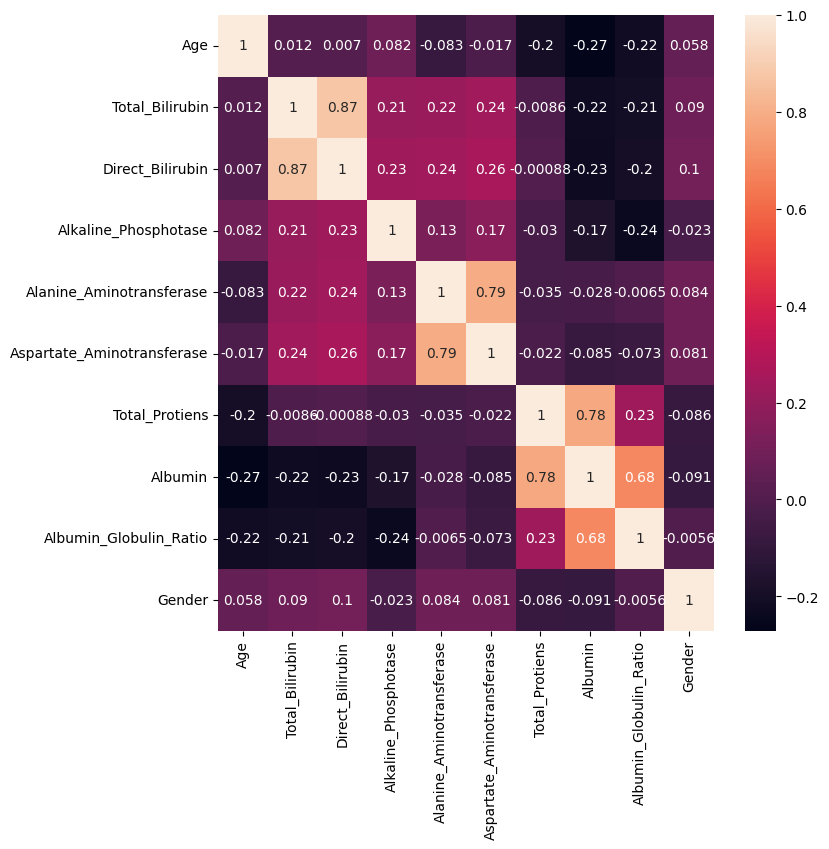

In [61]:
#Feature selection via correlation
plt.figure(figsize=(8,8))
sns.heatmap(X_scl.corr(), annot=True)
plt.show()

In [62]:
##Feature selection via filter method
# Threshold is set as 0.1; features below this threshold level can be removed

from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import VarianceThreshold as vt

X_train_vt, X_test_vt, y_train_vt, y_test_vt = tts(X_scl, y, test_size=0.2, random_state=9)
var_thr = vt(threshold=0.1)
var_thr.fit(X_train_vt)
print(var_thr.get_support())
print(sum(var_thr.get_support()))

[ True  True  True  True  True  True  True  True  True  True]
10


No feature has variance below the threshold.  We need not exclude any feature

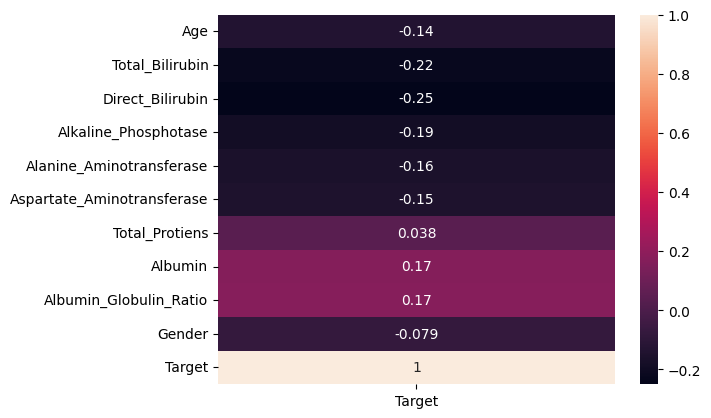

In [63]:
sns.heatmap(liver_data_upd_scl.corr()[["Target"]], annot=True)
plt.show()

No feature has significant correlation of 90% or above.  We need not exclude any feature

In [64]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(liver_data_upd_scl)

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []

No duplicate features available.  We need not exclude any feature

 Information gain

In [65]:
liver_data_dep_list = []

from sklearn.feature_selection import mutual_info_classif

for rand_stat in range(0,101):
    liver_data_dep = mutual_info_classif(X_scl, y, random_state=rand_stat)
    liver_data_dep_df = pd.DataFrame(liver_data_dep, columns=['Dependence'], index=X_scl.columns)
    liver_data_dep_df_col = liver_data_dep_df[liver_data_dep_df['Dependence'] == 0]
    liver_data_dep_list.append([rand_stat, liver_data_dep_df_col.index])

liver_data_dep_list

[[0, Index(['Total_Protiens'], dtype='object')],
 [1, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [2, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [3, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [4, Index(['Total_Protiens'], dtype='object')],
 [5,
  Index(['Total_Protiens', 'Albumin_Globulin_Ratio', 'Gender'], dtype='object')],
 [6, Index(['Total_Protiens'], dtype='object')],
 [7, Index(['Total_Protiens'], dtype='object')],
 [8, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [9, Index(['Gender'], dtype='object')],
 [10, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [11, Index(['Total_Protiens'], dtype='object')],
 [12, Index(['Total_Protiens'], dtype='object')],
 [13, Index(['Total_Protiens', 'Albumin'], dtype='object')],
 [14, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [15, Index(['Total_Protiens'], dtype='object')],
 [16, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [17, Index(['Total_Protien

1) Here Gender, Total Proteins and Albumin are identified as variables with mutual dependency.  However,
2) We cannot eliminate Total Proteins and Albumin as they are key features.  We can eliminate Gender alone

Chi2

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_feat = SelectKBest(chi2, k=8)

best_feat = chi2_feat.fit_transform(X, y) # X should be non-negative.  So, give actual X & y
best_feat_ind = chi2_feat.get_support(indices=True)
print(X.columns[[best_feat_ind]])

[['Age' 'Total_Bilirubin' 'Direct_Bilirubin' 'Alkaline_Phosphotase'
  'Alamine_Aminotransferase' 'Aspartate_Aminotransferase' 'Albumin'
  'Albumin_and_Globulin_Ratio']]


Gender can be removed

Feature Selection - Embedded method

Tree based(Feature importance) method

In [67]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
X_train_tb, X_test_tb, y_train_tb, y_test_tb = tts(X_scl, y, test_size=0.2, random_state=9)
tb_model = SelectFromModel(RandomForestClassifier(n_estimators=20, random_state=9))
tb_model.fit(X_train_tb, y_train_tb)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20,
                                                 random_state=9))

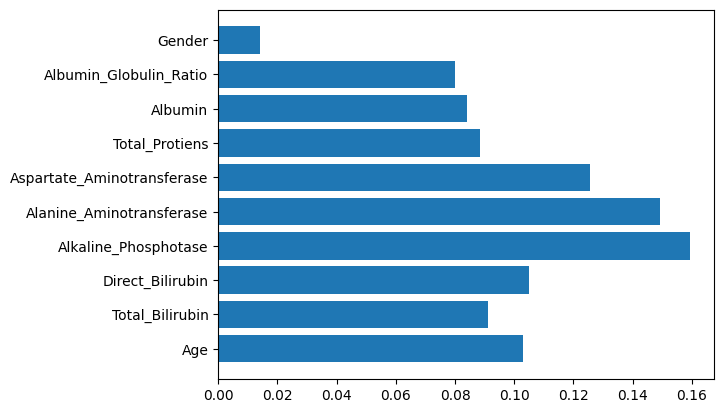

In [68]:
plt.barh(X_scl.columns, tb_model.estimator_.feature_importances_)
plt.show()

1) Based on all of the above feature selection methodologies, we could see Gender can be removed
2) We can proceed to build the model with and without Gender and identify the best model

In [69]:
# Create a dataframe without the feature "Gender"

X_scl_wog = X_scl.drop("Gender", axis=1)

Test-Train split

In [70]:
# With all features
X_train, X_test, y_train, y_test = tts(X_scl, y, test_size=0.2, random_state=9)

# Without the feature "Gender"
X_train_wog, X_test_wog, y_train_wog, y_test_wog = tts(X_scl_wog, y, test_size=0.2, random_state=9)

Apply SMOTE to balance the dataset

In [71]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
# With all features
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Without the feature "Gender"
X_train_wog_smote, y_train_wog_smote = smote.fit_resample(X_train_wog, y_train_wog)
print(y_train_smote.value_counts())
print(y_train_wog_smote.value_counts())

2    317
1    317
Name: Target, dtype: int64
2    317
1    317
Name: Target, dtype: int64


Model selection and creation
Given below are the variables used to build the model
1) ALL features - consider X_scl and y
2) Without Gender - consider X_scl_wog and y
(_wog = without the feature "Gender")

Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

# With all features
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
y_pred_lor = log_reg.predict(X_test)

# Without the feature Gender
log_reg_wog = LogisticRegression()
log_reg_wog.fit(X_train_wog_smote, y_train_wog_smote)
y_pred_wog_lor = log_reg_wog.predict(X_test_wog)

In [73]:
# Calculate the classification metrics(These are calculated for all of the ML models)
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [74]:
# With all features
cla_rep_lor = classification_report(y_test, y_pred_lor)
acc_sco_lor = accuracy_score(y_test, y_pred_lor)
f1_sco_lor = f1_score(y_test, y_pred_lor)
pre_sco_lor = precision_score(y_test, y_pred_lor)
rec_sco_lor = recall_score(y_test, y_pred_lor)
print(cla_rep_lor)

# Without the feature "Gender"
cla_rep_wog_lor = classification_report(y_test_wog, y_pred_wog_lor)
acc_sco_wog_lor = accuracy_score(y_test_wog, y_pred_wog_lor)
f1_sco_wog_lor = f1_score(y_test_wog, y_pred_wog_lor)
pre_sco_wog_lor = precision_score(y_test_wog, y_pred_wog_lor)
rec_sco_wog_lor = recall_score(y_test_wog, y_pred_wog_lor)
print(cla_rep_wog_lor)

              precision    recall  f1-score   support

           1       0.93      0.63      0.75        89
           2       0.39      0.84      0.53        25

    accuracy                           0.68       114
   macro avg       0.66      0.73      0.64       114
weighted avg       0.81      0.68      0.70       114

              precision    recall  f1-score   support

           1       0.92      0.63      0.75        89
           2       0.38      0.80      0.51        25

    accuracy                           0.67       114
   macro avg       0.65      0.71      0.63       114
weighted avg       0.80      0.67      0.70       114



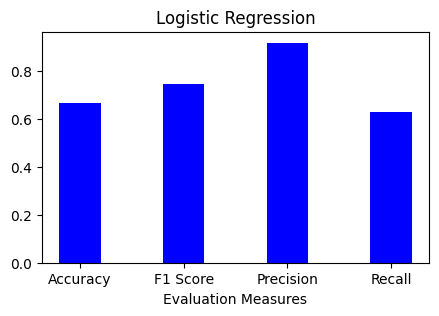

In [98]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Accuracy':acc_sco_wog_lor, 'F1 Score':f1_sco_wog_lor, 'Precision':pre_sco_wog_lor,'Recall':rec_sco_wog_lor}
measures = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(measures, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Evaluation Measures")
plt.ylabel("")
plt.title("Logistic Regression")
plt.show()

KNN

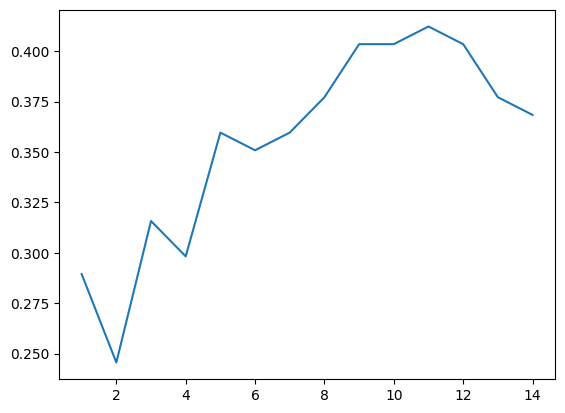

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Calculate optimum neighbor(With all features)
err_rate = []
for neighbor in range(1,15):
    knn_cla = KNeighborsClassifier(n_neighbors = neighbor)
    knn_cla.fit(X_train_smote, y_train_smote)
    y_pred_knn_init = knn_cla.predict(X_test)
    err_rate.append(np.mean(y_pred_knn_init != y_test))

plt.plot(range(1,15), err_rate)
plt.show()

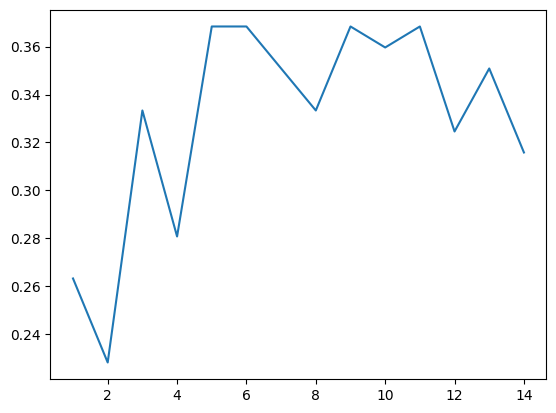

In [76]:
# Calculate optimum neighbor(Without the feature "Gender")
err_rate_wog = []
for neighbor in range(1,15):
    knn_cla_wog = KNeighborsClassifier(n_neighbors = neighbor)
    knn_cla_wog.fit(X_train_wog_smote, y_train_wog_smote)
    y_pred_knn_wog_init = knn_cla_wog.predict(X_test_wog)
    err_rate_wog.append(np.mean(y_pred_knn_wog_init != y_test_wog))

plt.plot(range(1,15), err_rate_wog)
plt.show()

Elbow point not visible in the KNN method.  Probably due to less data; hence skipping this method

SVM

In [77]:
from sklearn.svm import SVC

# Calculate the hyper parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 2],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'random_state': list(range(0,100))}

svc_hpt = SVC()
grid = GridSearchCV(svc_hpt, param_grid, refit=True, verbose=1, scoring='f1', cv=5)

grid.fit(X,y)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='f1', verbose=1)

In [78]:
# Best hyper parameters for SVM
print(grid.best_estimator_)

SVC(C=1, gamma=0.0001, random_state=0)


In [79]:
# With all features
svm_cla = SVC(C=1, gamma=0.0001, random_state=0)
svm_cla.fit(X_train_smote, y_train_smote)

y_pred_svm = svm_cla.predict(X_test)

cla_rep_svm = classification_report(y_test, y_pred_svm)
acc_sco_svm = accuracy_score(y_test, y_pred_svm)
f1_sco_svm = f1_score(y_test, y_pred_svm)
pre_sco_svm = precision_score(y_test, y_pred_svm)
rec_sco_svm = recall_score(y_test, y_pred_svm)
print(cla_rep_svm)

# Without the feature "Gender"
svm_cla_wog = SVC(C=1, gamma=0.0001, random_state=0)
svm_cla_wog.fit(X_train_wog_smote, y_train_wog_smote)

y_pred_wog_svm = svm_cla_wog.predict(X_test_wog)

cla_rep_wog_svm = classification_report(y_test_wog, y_pred_wog_svm)
acc_sco_wog_svm = accuracy_score(y_test_wog, y_pred_wog_svm)
f1_sco_wog_svm = f1_score(y_test_wog, y_pred_wog_svm)
pre_sco_wog_svm = precision_score(y_test_wog, y_pred_wog_svm)
rec_sco_wog_svm = recall_score(y_test_wog, y_pred_wog_svm)
print(cla_rep_wog_svm)

              precision    recall  f1-score   support

           1       1.00      0.16      0.27        89
           2       0.25      1.00      0.40        25

    accuracy                           0.34       114
   macro avg       0.62      0.58      0.34       114
weighted avg       0.84      0.34      0.30       114

              precision    recall  f1-score   support

           1       1.00      0.16      0.27        89
           2       0.25      1.00      0.40        25

    accuracy                           0.34       114
   macro avg       0.62      0.58      0.34       114
weighted avg       0.84      0.34      0.30       114



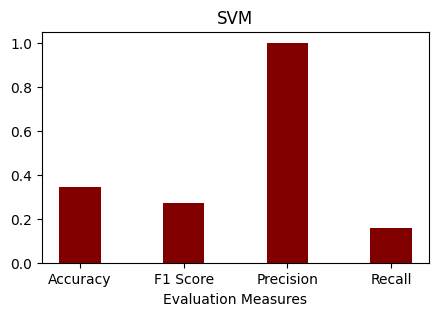

In [99]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Accuracy':acc_sco_wog_svm, 'F1 Score':f1_sco_wog_svm, 'Precision':pre_sco_wog_svm,'Recall':rec_sco_wog_svm}
measures = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(measures, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Evaluation Measures")
plt.ylabel("")
plt.title("SVM")
plt.show()

Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

# With all features
param_grid_dec_tree = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_gscv = DecisionTreeClassifier()

dec_tree_cv = GridSearchCV(dec_tree_gscv, param_grid_dec_tree, scoring='f1',
                        refit=True, verbose=1, cv=3, n_jobs=-1)

dec_tree_cv.fit(X_train_smote, y_train_smote)

print(dec_tree_cv.best_params_)
print(dec_tree_cv.best_score_)

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits


{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.7642409314823109


In [81]:
# With all features
dec_tree_best = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=2,
                                       min_samples_split=2, splitter='random')
dec_tree_best.fit(X_train_smote, y_train_smote)

y_pred_dec_tree = dec_tree_best.predict(X_test)

cla_rep_dec_tree = classification_report(y_test, y_pred_dec_tree)
acc_sco_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
f1_sco_dec_tree = f1_score(y_test, y_pred_dec_tree)
pre_sco_dec_tree = precision_score(y_test, y_pred_dec_tree)
rec_sco_dec_tree = recall_score(y_test, y_pred_dec_tree)
print(cla_rep_dec_tree)

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        89
           2       0.42      0.52      0.46        25

    accuracy                           0.74       114
   macro avg       0.64      0.66      0.64       114
weighted avg       0.76      0.74      0.75       114



In [82]:
# Without Gender

param_grid_dec_tree_wog = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_wog_gscv = DecisionTreeClassifier()

dec_tree_wog_cv = GridSearchCV(dec_tree_wog_gscv, param_grid_dec_tree_wog, scoring='f1',
                        refit=True, verbose=1, cv=3, n_jobs=-1)

dec_tree_wog_cv.fit(X_train_wog_smote, y_train_wog_smote)

print(dec_tree_wog_cv.best_params_)
print(dec_tree_wog_cv.best_score_)

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'random'}
0.7379151373192955


In [83]:
# Without the feature "Gender"
dec_tree_wog_best = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=1,
                                       min_samples_split=3, splitter='best')
dec_tree_wog_best.fit(X_train_wog_smote, y_train_wog_smote)

y_pred_wog_dec_tree = dec_tree_wog_best.predict(X_test_wog)

cla_rep_wog_dec_tree = classification_report(y_test_wog, y_pred_wog_dec_tree)
acc_sco_wog_dec_tree = accuracy_score(y_test_wog, y_pred_wog_dec_tree)
f1_sco_wog_dec_tree = f1_score(y_test_wog, y_pred_wog_dec_tree)
pre_sco_wog_dec_tree = precision_score(y_test_wog, y_pred_wog_dec_tree)
rec_sco_wog_dec_tree = recall_score(y_test_wog, y_pred_wog_dec_tree)
print(cla_rep_wog_dec_tree)

              precision    recall  f1-score   support

           1       0.83      0.79      0.81        89
           2       0.37      0.44      0.40        25

    accuracy                           0.71       114
   macro avg       0.60      0.61      0.60       114
weighted avg       0.73      0.71      0.72       114



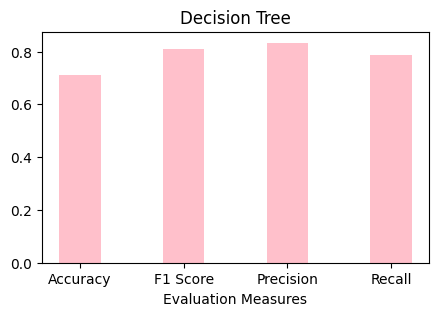

In [100]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Accuracy':acc_sco_wog_dec_tree, 'F1 Score':f1_sco_wog_dec_tree, 'Precision':pre_sco_wog_dec_tree,'Recall':rec_sco_wog_dec_tree}
measures = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(measures, values, color ='pink',
        width = 0.4)
 
plt.xlabel("Evaluation Measures")
plt.ylabel("")
plt.title("Decision Tree")
plt.show()

Random Forest

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Variables and values declaration for hyper parameter identification
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(y) for y in np.linspace(start=10, stop=110, num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

rand_frst_parm_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

In [85]:
from sklearn.ensemble import RandomForestClassifier

# With all features
rand_frst_rfcv = RandomForestClassifier(random_state=9)
rand_frst_cv = RandomizedSearchCV(estimator=rand_frst_rfcv, scoring='f1', param_distributions=rand_frst_parm_grid,
                                 n_iter=100, n_jobs=-1, verbose=3, cv=3, random_state=9)

rand_frst_cv.fit(X_train_smote, y_train_smote)
print("Best parameters for all features:", rand_frst_cv.best_params_)

# Without the feature "Gender"
rand_frst_rfcv_wog = RandomForestClassifier(random_state=9)
rand_frst_cv_wog = RandomizedSearchCV(estimator=rand_frst_rfcv_wog, scoring='f1', param_distributions=rand_frst_parm_grid,
                                 n_iter=100, n_jobs=-1, verbose=3, cv=3, random_state=9)

rand_frst_cv_wog.fit(X_train_wog_smote, y_train_wog_smote)
print("Best parameters for all features without Gender:", rand_frst_cv_wog.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Best parameters for all features: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 65, 'bootstrap': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for all features without Gender: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 76, 'bootstrap': True}


In [86]:
# With all features
rand_frst_bp = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=1,
                                      max_features="sqrt", max_depth=76, bootstrap=False, random_state=9)

rand_frst_bp.fit(X_train_smote, y_train_smote)

y_pred_ran_frst = rand_frst_bp.predict(X_test)

cla_rep_ran_frst = classification_report(y_test, y_pred_ran_frst)
acc_sco_ran_frst = accuracy_score(y_test, y_pred_ran_frst)
f1_sco_ran_frst = f1_score(y_test, y_pred_ran_frst)
pre_sco_ran_frst = precision_score(y_test, y_pred_ran_frst)
rec_sco_ran_frst = recall_score(y_test, y_pred_ran_frst)
print(cla_rep_ran_frst)

              precision    recall  f1-score   support

           1       0.82      0.81      0.81        89
           2       0.35      0.36      0.35        25

    accuracy                           0.71       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.71      0.71      0.71       114



In [87]:
# Without the feature "Gender"
rand_frst_bp_wog = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                                      max_features="sqrt", max_depth=21, bootstrap=True, random_state=9)

rand_frst_bp_wog.fit(X_train_wog_smote, y_train_wog_smote)

y_pred_wog_ran_frst = rand_frst_bp_wog.predict(X_test_wog)

cla_rep_wog_ran_frst = classification_report(y_test_wog, y_pred_wog_ran_frst)
acc_sco_wog_ran_frst = accuracy_score(y_test_wog, y_pred_wog_ran_frst)
f1_sco_wog_ran_frst = f1_score(y_test_wog, y_pred_wog_ran_frst)
pre_sco_wog_ran_frst = precision_score(y_test_wog, y_pred_wog_ran_frst)
rec_sco_wog_ran_frst = recall_score(y_test_wog, y_pred_wog_ran_frst)
print(cla_rep_wog_ran_frst)

              precision    recall  f1-score   support

           1       0.82      0.78      0.80        89
           2       0.33      0.40      0.36        25

    accuracy                           0.69       114
   macro avg       0.58      0.59      0.58       114
weighted avg       0.71      0.69      0.70       114



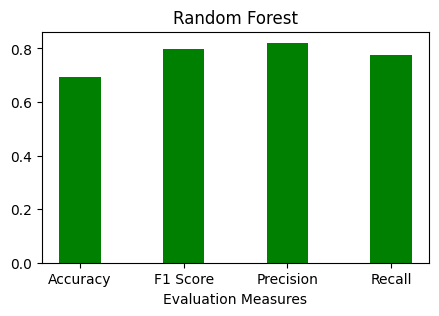

In [101]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Accuracy':acc_sco_wog_ran_frst, 'F1 Score':f1_sco_wog_ran_frst, 'Precision':pre_sco_wog_ran_frst,'Recall':rec_sco_wog_ran_frst}
measures = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(measures, values, color ='green',
        width = 0.4)
 
plt.xlabel("Evaluation Measures")
plt.ylabel("")
plt.title("Random Forest")
plt.show()

Gradient Boosting

In [88]:
# Test-Train split with raw data

# With all features
X_train_gb, X_test_gb, y_train_gb, y_test_gb = tts(X, y, test_size=0.2, random_state=9)

# Without the feature "Gender"
X_train_wog_gb, X_test_wog_gb, y_train_wog_gb, y_test_wog_gb = tts(X.drop(["Gender"], axis=1),y,test_size=0.2, random_state=9)

In [89]:
# SMOTE the raw data

# With all features
X_train_gb_smote, y_train_gb_smote = smote.fit_resample(X_train_gb, y_train_gb)

# Without the feature "Gender"
X_train_wog_gb_smote, y_train_wog_gb_smote = smote.fit_resample(X_train_wog_gb, y_train_wog_gb)

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

# With all features
gbc_smote = GradientBoostingClassifier()
gbc_smote.fit(X_train_gb_smote, y_train_gb_smote)

y_pred_gra_bost = gbc_smote.predict(X_test_gb)

cla_rep_gra_bost = classification_report(y_test_gb, y_pred_gra_bost)
acc_sco_gra_bost = accuracy_score(y_test_gb, y_pred_gra_bost)
f1_sco_gra_bost = f1_score(y_test_gb, y_pred_gra_bost)
pre_sco_gra_bost = precision_score(y_test_gb, y_pred_gra_bost)
rec_sco_gra_bost = recall_score(y_test_gb, y_pred_gra_bost)
print(cla_rep_gra_bost)

# Without the feature "Gender"
gbc_wog_smote = GradientBoostingClassifier()
gbc_wog_smote.fit(X_train_wog_gb_smote, y_train_wog_gb_smote)

y_pred_wog_gra_bost = gbc_wog_smote.predict(X_test_wog_gb)

cla_rep_wog_gra_bost = classification_report(y_test_gb, y_pred_wog_gra_bost)
acc_sco_wog_gra_bost = accuracy_score(y_test_gb, y_pred_wog_gra_bost)
f1_sco_wog_gra_bost = f1_score(y_test_gb, y_pred_wog_gra_bost)
pre_sco_wog_gra_bost = precision_score(y_test_gb, y_pred_wog_gra_bost)
rec_sco_wog_gra_bost = recall_score(y_test_gb, y_pred_wog_gra_bost)
print(cla_rep_wog_gra_bost)

              precision    recall  f1-score   support

           1       0.84      0.81      0.82        89
           2       0.39      0.44      0.42        25

    accuracy                           0.73       114
   macro avg       0.62      0.62      0.62       114
weighted avg       0.74      0.73      0.73       114

              precision    recall  f1-score   support

           1       0.83      0.75      0.79        89
           2       0.33      0.44      0.38        25

    accuracy                           0.68       114
   macro avg       0.58      0.60      0.58       114
weighted avg       0.72      0.68      0.70       114



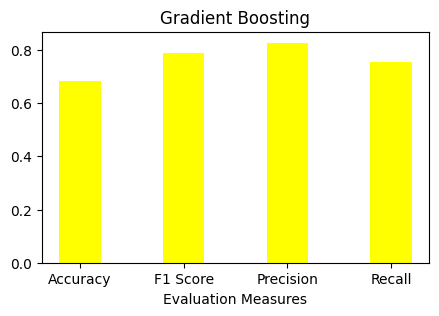

In [102]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Accuracy':acc_sco_wog_gra_bost, 'F1 Score':f1_sco_wog_gra_bost, 'Precision':pre_sco_wog_gra_bost,'Recall':rec_sco_wog_gra_bost}
measures = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(measures, values, color ='yellow',
        width = 0.4)
 
plt.xlabel("Evaluation Measures")
plt.ylabel("")
plt.title("Gradient Boosting")
plt.show()

ANN

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
# With all features

ann_smote = MLPClassifier(hidden_layer_sizes=(50,3),
                    learning_rate_init=0.1,
                    max_iter=100,
                    random_state=9)
ann_smote.fit(X_train_gb_smote, y_train_gb_smote)

y_pred_ann = ann_smote.predict(X_test_gb)

cla_rep_ann = classification_report(y_test_gb, y_pred_ann)
acc_sco_ann = accuracy_score(y_test_gb, y_pred_ann)
f1_sco_ann = f1_score(y_test_gb, y_pred_ann)
pre_sco_ann = precision_score(y_test_gb, y_pred_ann)
rec_sco_ann = recall_score(y_test_gb, y_pred_ann)

print("With all parameters:")
print(cla_rep_ann)

With all parameters:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           2       0.22      1.00      0.36        25

    accuracy                           0.22       114
   macro avg       0.11      0.50      0.18       114
weighted avg       0.05      0.22      0.08       114



In [93]:
# Without the feature "Gender"

ann_wog_smote = MLPClassifier(hidden_layer_sizes=(50,3),
                    learning_rate_init=0.1,
                    max_iter=100,
                    random_state=9)
ann_wog_smote.fit(X_train_wog_gb_smote, y_train_wog_gb_smote)

y_pred_wog_ann = ann_wog_smote.predict(X_test_wog_gb)

cla_rep_wog_ann = classification_report(y_test_wog_gb, y_pred_wog_ann)
acc_sco_wog_ann = accuracy_score(y_test_wog_gb, y_pred_wog_ann)
f1_sco_wog_ann = f1_score(y_test_wog_gb, y_pred_wog_ann)
pre_sco_wog_ann = precision_score(y_test_wog_gb, y_pred_wog_ann)
rec_sco_wog_ann = recall_score(y_test_wog_gb, y_pred_wog_ann)

print("Without Gender:")
print(cla_rep_wog_ann)

Without Gender:
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        89
           2       0.00      0.00      0.00        25

    accuracy                           0.78       114
   macro avg       0.39      0.50      0.44       114
weighted avg       0.61      0.78      0.68       114



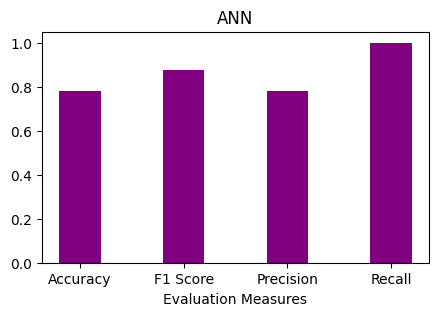

In [103]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Accuracy':acc_sco_wog_ann, 'F1 Score':f1_sco_wog_ann, 'Precision':pre_sco_wog_ann,'Recall':rec_sco_wog_ann}
measures = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(measures, values, color ='purple',
        width = 0.4)
 
plt.xlabel("Evaluation Measures")
plt.ylabel("")
plt.title("ANN")
plt.show()

Model comparison and evaluation

In [95]:
liver_data_metrics = {
    "Model" : ["Logistic Regression(All features)", "Logistic Regression(without Gender)",
               "SVM(All features)", "SVM(Without Gender)",
               "Decision Tree(All features)", "Decision Tree(Without Gender)",
               "Random Forest(All features)", "Random Forest(Without Gender)",
               "Gradient Boosting(All features)", "Gradient Boosting(Without Gender)",
               "ANN(Without Gender)"],
    "Accuracy" : [acc_sco_lor, acc_sco_wog_lor, acc_sco_svm, acc_sco_wog_svm,
                  acc_sco_dec_tree, acc_sco_wog_dec_tree, acc_sco_ran_frst, acc_sco_wog_ran_frst,
                  acc_sco_gra_bost, acc_sco_wog_gra_bost, acc_sco_wog_ann],
    "F1_score" : [f1_sco_lor, f1_sco_wog_lor, f1_sco_svm, f1_sco_wog_svm,
                  f1_sco_dec_tree, f1_sco_wog_dec_tree, f1_sco_ran_frst, f1_sco_wog_ran_frst,
                  f1_sco_gra_bost, f1_sco_wog_gra_bost, f1_sco_wog_ann],
    "Precision" : [pre_sco_lor, pre_sco_wog_lor, pre_sco_svm, pre_sco_wog_svm,
                  pre_sco_dec_tree, pre_sco_wog_dec_tree, pre_sco_ran_frst, pre_sco_wog_ran_frst,
                  pre_sco_gra_bost, pre_sco_wog_gra_bost, pre_sco_wog_ann],
    "Recall" : [rec_sco_lor, rec_sco_wog_lor, rec_sco_svm, rec_sco_wog_svm,
                  rec_sco_dec_tree, rec_sco_wog_dec_tree, rec_sco_ran_frst, rec_sco_wog_ran_frst,
                  rec_sco_gra_bost, rec_sco_wog_gra_bost, rec_sco_wog_ann]
}

In [96]:
liver_data_metrics_df = pd.DataFrame(liver_data_metrics)
liver_data_metrics_df.set_index("Model", inplace=True)
liver_data_metrics_df = (liver_data_metrics_df * 100).round(2)

In [97]:
# Tabular view of the performance metrics for quicker comparison and evaluation
print(liver_data_metrics_df)

                                     Accuracy  F1_score  Precision  Recall
Model                                                                     
Logistic Regression(All features)       67.54     75.17      93.33   62.92
Logistic Regression(without Gender)     66.67     74.67      91.80   62.92
SVM(All features)                       34.21     27.18     100.00   15.73
SVM(Without Gender)                     34.21     27.18     100.00   15.73
Decision Tree(All features)             73.68     82.56      85.54   79.78
Decision Tree(Without Gender)           71.05     80.92      83.33   78.65
Random Forest(All features)             71.05     81.36      81.82   80.90
Random Forest(Without Gender)           69.30     79.77      82.14   77.53
Gradient Boosting(All features)         72.81     82.29      83.72   80.90
Gradient Boosting(Without Gender)       68.42     78.82      82.72   75.28
ANN(Without Gender)                     78.07     87.68      78.07  100.00


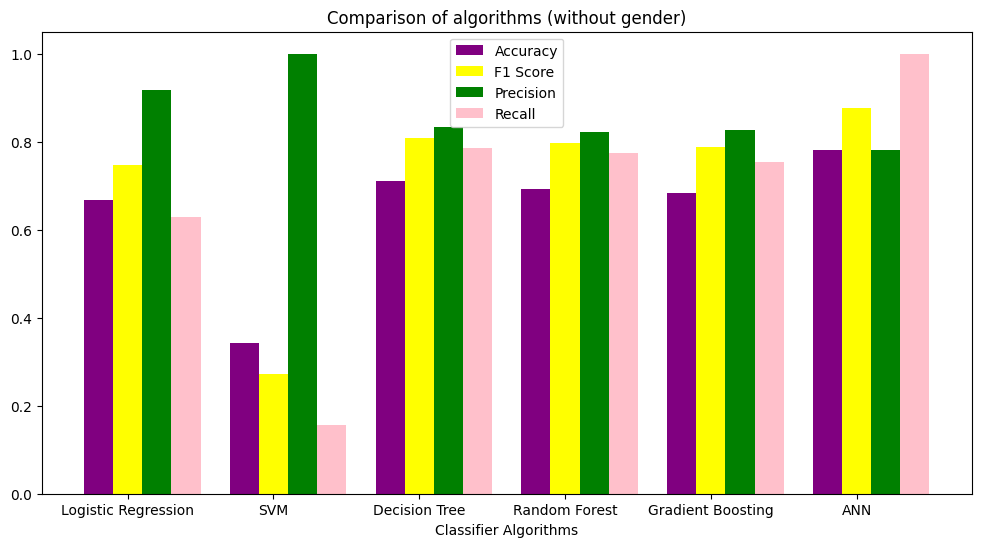

In [112]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 6))
N = 6
ind = np.arange(N)
width = 0.20

avals = [acc_sco_wog_lor, acc_sco_wog_svm, acc_sco_wog_dec_tree, acc_sco_wog_ran_frst, acc_sco_wog_gra_bost, acc_sco_wog_ann]
bar1 = plt.bar(ind, avals, width, color = 'purple')

fvals = [f1_sco_wog_lor, f1_sco_wog_svm, f1_sco_wog_dec_tree, f1_sco_wog_ran_frst, f1_sco_wog_gra_bost, f1_sco_wog_ann]
bar2 = plt.bar(ind+width, fvals, width, color='yellow')

pvals = [pre_sco_wog_lor, pre_sco_wog_svm, pre_sco_wog_dec_tree, pre_sco_wog_ran_frst, pre_sco_wog_gra_bost, pre_sco_wog_ann]
bar3 = plt.bar(ind+width*2, pvals, width, color = 'green')

rvals = [rec_sco_wog_lor, rec_sco_wog_svm, rec_sco_wog_dec_tree, rec_sco_wog_ran_frst, rec_sco_wog_gra_bost, rec_sco_wog_ann]
bar4 = plt.bar(ind+width*3, rvals, width, color = 'pink')


plt.xlabel("Classifier Algorithms")
plt.ylabel('')
plt.title("Comparison of algorithms (without gender)")

plt.xticks(ind+width,['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','Gradient Boosting','ANN'])
plt.legend( (bar1, bar2, bar3, bar4), ('Accuracy', 'F1 Score', 'Precision', 'Recall') )
plt.show()


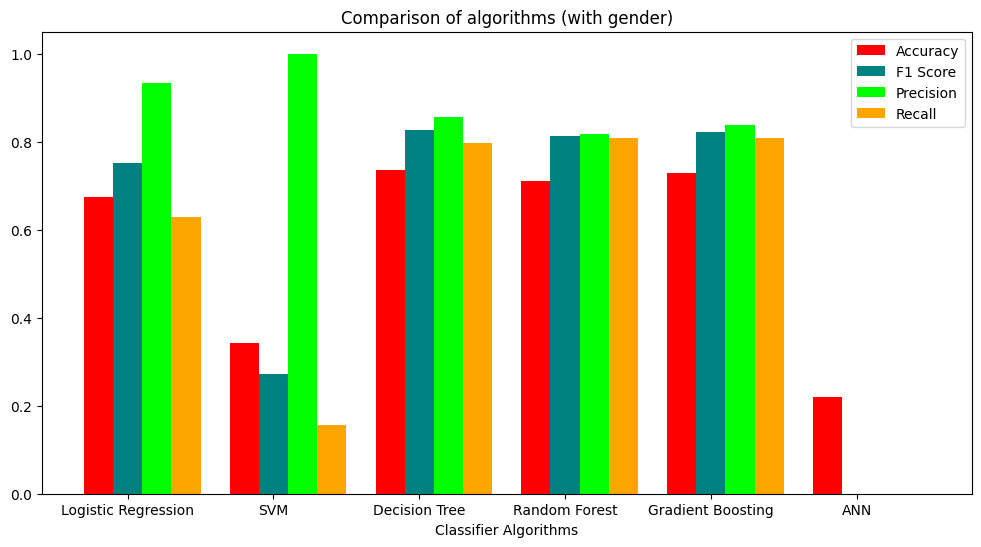

In [117]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 6))
N = 6
ind = np.arange(N)
width = 0.20

avals = [acc_sco_lor, acc_sco_svm, acc_sco_dec_tree, acc_sco_ran_frst, acc_sco_gra_bost, acc_sco_ann]
bar1 = plt.bar(ind, avals, width, color = 'red')

fvals = [f1_sco_lor, f1_sco_svm, f1_sco_dec_tree, f1_sco_ran_frst, f1_sco_gra_bost, f1_sco_ann]
bar2 = plt.bar(ind+width, fvals, width, color='teal')

pvals = [pre_sco_lor, pre_sco_svm, pre_sco_dec_tree, pre_sco_ran_frst, pre_sco_gra_bost, pre_sco_ann]
bar3 = plt.bar(ind+width*2, pvals, width, color = 'lime')

rvals = [rec_sco_lor, rec_sco_svm, rec_sco_dec_tree, rec_sco_ran_frst, rec_sco_gra_bost, rec_sco_ann]
bar4 = plt.bar(ind+width*3, rvals, width, color = 'orange')


plt.xlabel("Classifier Algorithms")
plt.ylabel('')
plt.title("Comparison of algorithms (with gender)")

plt.xticks(ind+width,['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','Gradient Boosting','ANN'])
plt.legend( (bar1, bar2, bar3, bar4), ('Accuracy', 'F1 Score', 'Precision', 'Recall') )
plt.show()
